The moons dataset is a synthetic dataset commonly used in machine learning, particularly for classification tasks and visualization purposes. It consists of two interleaved half circles, often referred to as "moons,"  representing two distinct classes.

Here's a breakdown of its characteristics:

Type: Synthetic (artificially generated)

Purpose: Classification and visualization

Structure:
Two features (dimensions)

Two classes (represented by the two moon shapes)

Each data point has two values corresponding to the features.

### 1. Import Libraries and Generate Moons Dataset:

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

### Generate Data

In [2]:
# Generate moons data
X, y = make_moons(n_samples=1000, noise=0.3)

### 2. Exploratory Data Analysis (EDA)


In [6]:
# 1. Data Shape and Description
print("Data Shape:", X.shape)
print("Description of first 5 rows:")
print(X[:5])
print("Description of target variable:")
print(pd.Series(y).value_counts())  # Convert y to pandas Series

Data Shape: (1000, 2)
Description of first 5 rows:
[[-0.44217815  0.51989757]
 [ 1.72508824 -0.5738459 ]
 [ 0.33511335 -0.22898672]
 [-0.06722911 -0.1512287 ]
 [-0.72690336  0.85943816]]
Description of target variable:
0    500
1    500
dtype: int64


In [8]:
# 2. Check for Missing Values
import numpy as np
print("Missing values in features:", np.isnan(X).sum(axis=0))

Missing values in features: [0 0]


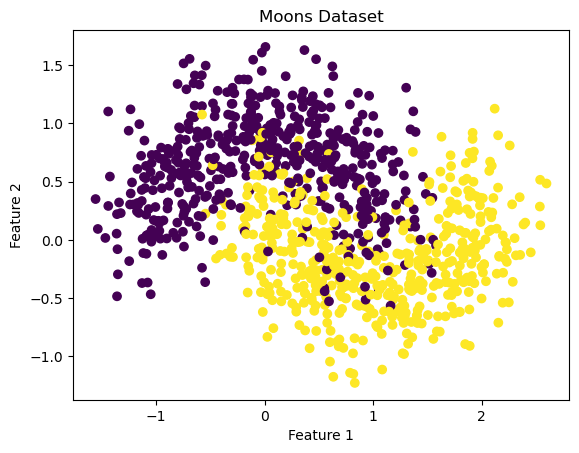

In [9]:
# 3. Visualize the moons data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 3. Train-Test Split:

Split the data into training and testing sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Define Decision Tree Classifier:

In [11]:
# Define the decision tree classifier
clf = DecisionTreeClassifier()

### 5. Hyperparameter Tuning with GridSearchCV:

We'll tune two important hyperparameters for decision trees:

max_depth: Maximum depth of the tree.
min_samples_split: Minimum number of samples required to split a node.

In [12]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy')

# Train the model
grid_clf.fit(X_train, y_train)

# Get the best model
best_model = grid_clf.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_clf.best_params_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5}


### 6. Evaluate the Model:

Evaluate the model's performance on the test set.

In [13]:
# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.865


### 7. Visualize the Decision Tree:

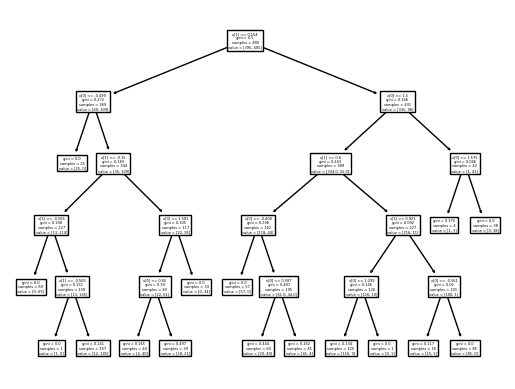

In [14]:
# Visualize the decision tree
plot_tree(best_model)
plt.show()